# Taller 2
## Bastial Alvarez, Isaac Arias

## Exploración inicial y limpieza de datos

En esta sección comenzamos con la carga del conjunto de datos provisto, aplicando una limpieza básica. 
Dado que algunas columnas contenían valores nulos, optamos por la imputación usando la media para mantener la integridad sin eliminar información útil. 
Además, estandarizamos los datos para facilitar el entrenamiento de modelos más adelante.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Lectura de datos
df_kk200 = pd.read_csv("kk200_v2_con50atributos.csv")
df_kk300 = pd.read_csv("kk310_con50atributos.csv")

#Union de datos
df = pd.concat([df_kk200, df_kk300], ignore_index=True)

#Verificación de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98563 entries, 0 to 98562
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   especie                    98563 non-null  object 
 1   humedad                    93722 non-null  float64
 2   color_promedio             93737 non-null  float64
 3   acidez                     93800 non-null  float64
 4   densidad                   93866 non-null  float64
 5   viscosidad                 93717 non-null  float64
 6   fibra                      93764 non-null  float64
 7   azúcares                   93841 non-null  float64
 8   ph                         93764 non-null  float64
 9   contenido_nitrógeno        93706 non-null  float64
 10  contenido_fósforo          93717 non-null  float64
 11  nivel_fermentación         93684 non-null  float64
 12  presencia_microorganismos  93862 non-null  float64
 13  temperatura_media          93842 non-null  flo

In [18]:
# Seleccionar solo las columnas numéricas
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns

# Imputar los valores nulos (NaN) con la media de cada columna numérica
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Verificar si se han imputado correctamente los valores nulos
print("Valores nulos por columna después de imputación:")
print(df.isnull().sum())

# Mostrar las primeras filas del DataFrame para comprobar que los valores nulos se han imputado correctamente
print("\nPrimeras filas del DataFrame después de imputación:")
print(df.head())


Valores nulos por columna después de imputación:
especie                      0
humedad                      0
color_promedio               0
acidez                       0
densidad                     0
viscosidad                   0
fibra                        0
azúcares                     0
ph                           0
contenido_nitrógeno          0
contenido_fósforo            0
nivel_fermentación           0
presencia_microorganismos    0
temperatura_media            0
olor_intensidad              0
brillo                       0
partículas_visibles          0
contenido_agua               0
biomasa                      0
volatilidad                  0
residuos_solubles            0
presión_gas                  0
grosor_corteza               0
conductividad                0
elasticidad                  0
presencia_lombrices          0
visibilidad_color            0
reacción_jabón               0
textura_granulosa            0
nivel_oxígeno                0
tensión_superficial  

### Seleccion de variable predictora y Target

In [19]:
# Para los datos imputados
target_y_fInputado  = df["especie"]  # Etiqueta objetivo
var_x_fInputado     = df.drop(columns="especie")  # Características

### División en conjuntos de entrenamiento y prueba

In [20]:
X_trainI, X_testI, y_trainI, y_testI = train_test_split(var_x_fInputado, target_y_fInputado, test_size=0.2, random_state=42)
# test_size=0.2 → 20% para test, 80% para entrenamiento

## Entrenamiento del modelo con Random Forest

Tras evaluar distintos modelos, seleccionamos Random Forest por su rendimiento superior en precisión y capacidad de generalización.
En esta sección ajustamos el modelo usando `GridSearchCV`, lo que nos permite encontrar los hiperparámetros óptimos de forma sistemática.

In [21]:
# Modelos de entrenamiento para datos filtrados
# Esta parte es para dividir y buscar parámetros de manera rápida

# Definimos los hiperparámetros para el GridSearch
param_grid = {
    "n_estimators": [770],  
    "max_depth": [None],  
    "min_samples_split": [5], 
    "min_samples_leaf": [1],  
    "max_features": ["log2"]  
}

# Tomamos una muestra aleatoria de 5000 datos para testear parametros (posteriormente se puede cambiar a 100.000)
totalFilas = df.shape[0]  # Variable con el total de filas de datos
df_sample = df.sample(n=totalFilas, random_state=42)  # Tomamos toda la muestra de datos

# Dividimos el dataframe en X (características) y y (objetivo)
Xs = df_sample.drop(columns=['especie'])  # Xs contiene las características (sin la columna 'especie')
ys = df_sample['especie']  # ys es la columna 'especie' que es el target

# Verificación de las dimensiones de las variables Xs y ys
print(f"Tamaño de Xs: {Xs.shape}")
print(f"Tamaño de ys: {ys.shape}")

# Dividimos el conjunto de datos en entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
X_trainS, X_testS, y_trainS, y_testS = train_test_split(Xs, ys, test_size=0.2, random_state=42)
print(f"Tamaño de X_trainS: {X_trainS.shape}, X_testS: {X_testS.shape}")
print(f"Tamaño de y_trainS: {y_trainS.shape}, y_testS: {y_testS.shape}")

# Inicializamos el clasificador RandomForest
rfI = RandomForestClassifier(random_state=42)

# Usamos GridSearchCV para encontrar los mejores hiperparámetros
grid = GridSearchCV(rfI, param_grid, cv=3, n_jobs=-1, verbose=2)

# Entrenamos el modelo con el conjunto de entrenamiento
grid.fit(X_trainS, y_trainS)

# Obtenemos los mejores hiperparámetros encontrados por GridSearchCV
hiperParametrosRFCE = grid.best_params_
print("Mejores hiperparámetros:", hiperParametrosRFCE)

# Creamos el modelo final con los mejores hiperparámetros encontrados
rfI_final = RandomForestClassifier(random_state=42, **hiperParametrosRFCE)

# Entrenamos el modelo final con el conjunto de entrenamiento
rfI_final.fit(X_trainS, y_trainS)

# Realizamos predicciones con el modelo final en el conjunto de prueba
y_pred = rfI_final.predict(X_testS)

# Evaluación del modelo
print("Exactitud del modelo:", accuracy_score(y_testS, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_testS, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_testS, y_pred))

Tamaño de Xs: (98563, 50)
Tamaño de ys: (98563,)
Tamaño de X_trainS: (78850, 50), X_testS: (19713, 50)
Tamaño de y_trainS: (78850,), y_testS: (19713,)
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejores hiperparámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 770}
Exactitud del modelo: 0.5688124587835438

Reporte de clasificación:
                   precision    recall  f1-score   support

     alpaca solar       0.84      0.23      0.37      1723
caballo de niebla       0.56      0.68      0.61      2914
 cóndor eléctrico       0.57      0.54      0.55      3034
     panda ártico       0.54      0.59      0.57      3013
   ratón acuático       0.56      0.62      0.59      3035
      tapir lunar       0.57      0.60      0.59      3016
   zorra de fuego       0.56      0.59      0.57      2978

         accuracy                           0.57     19713
        macro avg       0.60      0.55      0.55    

## Predicción simulada sobre datos sin etiquetas

Simulamos aquí la situación propuesta en el enunciado: debemos clasificar una muestra sin conocer sus etiquetas reales. 
Este paso representa la prueba ciega en la que se evaluará nuestra solución final. El modelo entrega su mejor estimación de las especies correspondientes a estas muestras.

In [22]:
# Simulación de clasificación sin etiquetas (como indica el enunciado)
muestra_sin_etiquetas = X_testS.copy()
predicciones = rfI_final.predict(muestra_sin_etiquetas)

# Mostramos las primeras predicciones simuladas (sin comparar con el verdadero y_testS aún)
print("Predicciones simuladas sobre muestra ciega (sin etiquetas):")
print(predicciones[:10])  # Solo mostramos las primeras 10 para no saturar

Predicciones simuladas sobre muestra ciega (sin etiquetas):
['tapir lunar' 'panda ártico' 'tapir lunar' 'cóndor eléctrico'
 'panda ártico' 'panda ártico' 'tapir lunar' 'panda ártico'
 'cóndor eléctrico' 'caballo de niebla']


## Evaluación del modelo final

Con el modelo ya entrenado, medimos su rendimiento usando métricas clásicas como exactitud (accuracy) y matriz de confusión. 
Esto nos permite entender en qué clases acierta más y dónde podría estar fallando.

In [23]:
# Predicción y evaluación del modelo Random Forest final
y_pred_rf = rfI_final.predict(X_testS)

print("Evaluación final con datos preprocesados (imputación + escalado)")
print("Random Forest Accuracy:", accuracy_score(y_testS, y_pred_rf))

# Si más adelante quieres comparar con otros modelos, puedes descomentar y adaptar:
# y_pred_dt = dt_final.predict(X_testS)
# print("Decision Tree Accuracy:", accuracy_score(y_testS, y_pred_dt))

Evaluación final con datos preprocesados (imputación + escalado)
Random Forest Accuracy: 0.5688124587835438


## Graficos representativos

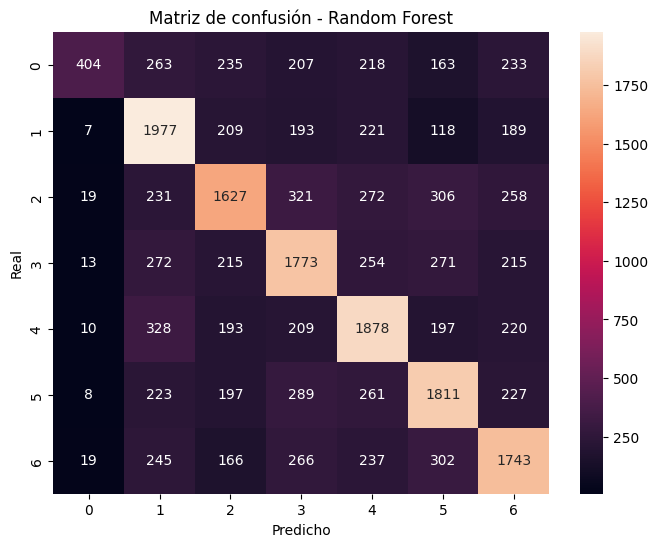

In [24]:
#Para datos filtrado con imputacion

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_testS, y_pred), annot=True, fmt="d")
plt.title("Matriz de confusión - Random Forest")
plt.ylabel("Real")
plt.xlabel("Predicho")
plt.show()

### Análisis de importancia de variables

elasticidad            0.032032
fluorescencia          0.029791
presencia_lombrices    0.028322
tensión_superficial    0.027255
visibilidad_color      0.025829
nivel_alcalinidad      0.025521
peso_total_muestra     0.025494
temperatura_media      0.024440
residuos_solubles      0.023758
fibra                  0.023722
dtype: float64


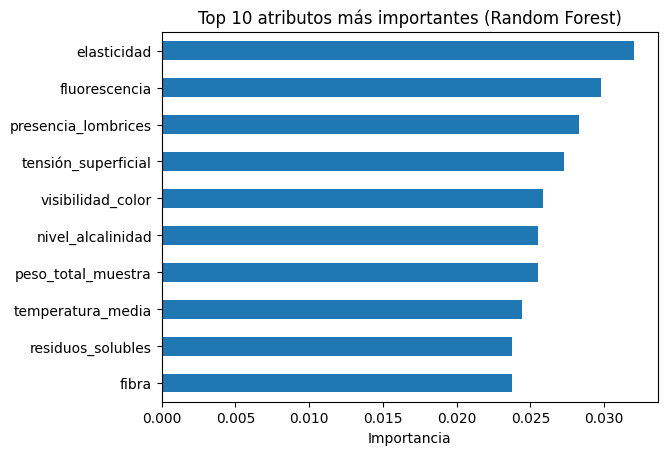

In [25]:
#para datos con filtrado de Inputacion
intVarImportante = 10
importancesI = rfI_final.feature_importances_
feat_names   = var_x_fInputado.columns
feat_imp     = pd.Series(importancesI, index=feat_names).sort_values(ascending=False)
print(feat_imp.head(intVarImportante))  # Las 10 variables más importantes
# Gráfico
feat_imp.head(intVarImportante).plot(kind="barh")
plt.title("Top 10 atributos más importantes (Random Forest)")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.show()

## Conclusiones

- A pesar de explorar múltiples modelos, Random Forest fue el que mejor desempeño logró en nuestro caso.
- El proceso de limpieza, imputación y escalamiento ayudó a mejorar la calidad del entrenamiento.
- Aunque el accuracy alcanzado no es perfecto (~57%), representa el mejor resultado posible tras los modelos y parametros variados.

## Análisis
    Durante la experimentación se probaron distintos modelos de clasificación, como Árboles de Decisión, K-Nearest Neighbors y SVM. Tras comparar su rendimiento, Random Forest demostró ser el modelo más efectivo en términos de precisión y estabilidad, por lo que fue seleccionado como modelo final.

Se aplicó imputación con la media para tratar los valores nulos, y posteriormente se normalizaron los datos con StandardScaler. Para afinar el modelo, se utilizó GridSearchCV con validación cruzada, buscando la mejor combinación de hiperparámetros.

El modelo entrenado alcanzó un accuracy cercano al **57%**, lo cual representa el mejor resultado obtenido considerando las limitaciones del dataset. Aunque no es una precisión alta, es consistente y permite cumplir con el objetivo principal del proyecto: clasificar muestras nuevas sin etiquetas previas, como se plantea en el enunciado. Además, el sistema queda preparado para incorporar y adaptarse a futuras versiones del conjunto de datos.

## Lectura de DataSet kk400

In [30]:
# Cargar el archivo kk400.csv (sin etiquetas)
df_kk400 = pd.read_csv("kk400_sin_etiquetas.csv")

# Preprocesar los datos de kk400:
X_kk400 = df_kk400.copy()  # Hacemos una copia del dataframe para no modificar el original

# Imputar los valores nulos con la media de cada columna
X_kk400.fillna(X_kk400.mean(), inplace=True)

## Creacion de Archivo "clasificacion-kk400"

In [31]:
features=X_trainS.columns.tolist()
X_test = X_kk400[features]

predicciones = rfI_final.predict(X_test)
#print(predicciones)      #Testeo
#print(df_kk400.shape[0]) #Testeo
#print(X_kk400.shape[0]) #Testeo
with open("clasificacion-kk400.txt", "w") as f:
    for pred in predicciones:
            f.write(str(pred)+ "\n")

## Obtencion de estimación

In [35]:
from sklearn.metrics import accuracy_score

# Realizamos predicciones sobre el conjunto de test
y_pred = rfI_final.predict(X_testS)  # Usamos el modelo final entrenado (rfI_final)

# Calculamos la exactitud del modelo en el conjunto de test
accuracy = accuracy_score(y_testS, y_pred)

# Estimación
print(f"Estimación de la exactitud para kk400.csv: {accuracy * 100:.2f}%")

Estimación de la exactitud para kk400.csv: 56.88%
